In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import re

In [2]:
df = pd.read_csv("C:/Users/dadadah_ye/Downloads/total_data_11_27.csv", encoding = 'utf-8-sig')
df = df.dropna()
df['score'].value_counts()

1    82598
0    10218
Name: score, dtype: int64

In [3]:
# Solve data imbalanced
def under_sampling(df, target_label):
    rus  = RandomUnderSampler(return_indices=True)
    X_tl, y_tl, id_tl = rus.fit_sample(df, df[target_label])

    # remake data frame.
    columns = df.columns
    df = pd.DataFrame(X_tl, columns=columns)
    # df = df.astype(float)

    return df

df = under_sampling(df, "score")
df['score'].value_counts()

1    10218
0    10218
Name: score, dtype: int64

In [4]:
# remove emoji
def emoji(df):
    EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return EMOJI.sub(r'', df)

df['review'] = df['review'].apply(emoji)

# replace \n
def replaceText(df):
    text = df.replace("\n",".")
    return text

df['review'] = df['review'].apply(replaceText)

# regular expression
def cleanText(df):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', df)
    return text

df['review'] = df['review'].apply(cleanText)


In [5]:
from konlpy.tag import Kkma
from sklearn.model_selection import train_test_split

kkma = Kkma()
train, test = train_test_split(df, test_size=0.2)

train_x = []
train_y = []
test_x = []
test_y = []

for i, row in train.iterrows():
    train_x.append(['/'.join(token) for token in kkma.pos(row[0])])
    train_y.append(row[1])
    
for i, row in test.iterrows():
    test_x.append(['/'.join(token) for token in kkma.pos(row[0])])
    test_y.append(row[1])

C:\Users\dadadah_ye\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
train_x[0:10]

[['SNS/OL',
  '에서/JKM',
  '핫/NNG',
  '플레이스/NNG',
  '로/JKM',
  '급부상/NNG',
  '하/XSV',
  '고/ECE',
  '있/VXV',
  '는/ETD',
  '후/NNG',
  '쿠/VV',
  '오/EFN',
  '카/MAG',
  '함/NNG',
  '바/NNG',
  '그/MDT',
  '추천/NNG',
  '이/JKS',
  '하도/MAG',
  '많/VA',
  '아서/ECD',
  '일부러/MAG',
  '찾/VV',
  '아서/ECD',
  '다녀오/VV',
  '았/EPT',
  '는데/ECD',
  '기대/NNG',
  '하/XSV',
  '었/EPT',
  '더/EPT',
  'ㄴ/ETD',
  '만큼/NNB',
  '괜찮/VA',
  '았/EPT',
  '더/EPT',
  'ㄴ/ETD',
  '것/NNB',
  '같/VA',
  '아요/EFN',
  '9/NR',
  '층/NNG',
  '이/VCP',
  '라/ECD',
  '창가/NNG',
  '쪽/NNB',
  '에/JKM',
  '앉/VV',
  '았/EPT',
  '더니/ECD',
  '야경/NNG',
  '도/JX',
  '좋/VA',
  '고/ECE',
  '물론/MAG',
  '테이블/NNG',
  '에서/JKM',
  '지글지글/MAG',
  '거리/VV',
  '어서/ECD',
  '냄새/NNG',
  '는/JX',
  '좀/MAG',
  '날/VV',
  '는데/ECD',
  '그거/NP',
  '빼/VV',
  '고는/ECE',
  '전반적/NNG',
  '으로/JKM',
  '모두/MAG',
  '만족/NNG',
  '하/XSV',
  '었/EPT',
  '습니다/EFN',
  '가격/NNG',
  '이/JKS',
  '좀/MAG',
  '그리하/VV',
  '여도/ECD',
  '나가/VXV',
  '는/ETD',
  '편/NNB',
  '이/VCP',
  'ㄴ데/ECE',
  '100/NR',
  '프로/NNG

In [7]:
tokens = [d for token in train_x for d in token]
tokens[0:10]

['SNS/OL',
 '에서/JKM',
 '핫/NNG',
 '플레이스/NNG',
 '로/JKM',
 '급부상/NNG',
 '하/XSV',
 '고/ECE',
 '있/VXV',
 '는/ETD']

In [20]:
import nltk

text = nltk.Text(tokens, name='NMSC')
print(len(text))

1312773


### visualization most 50 words.

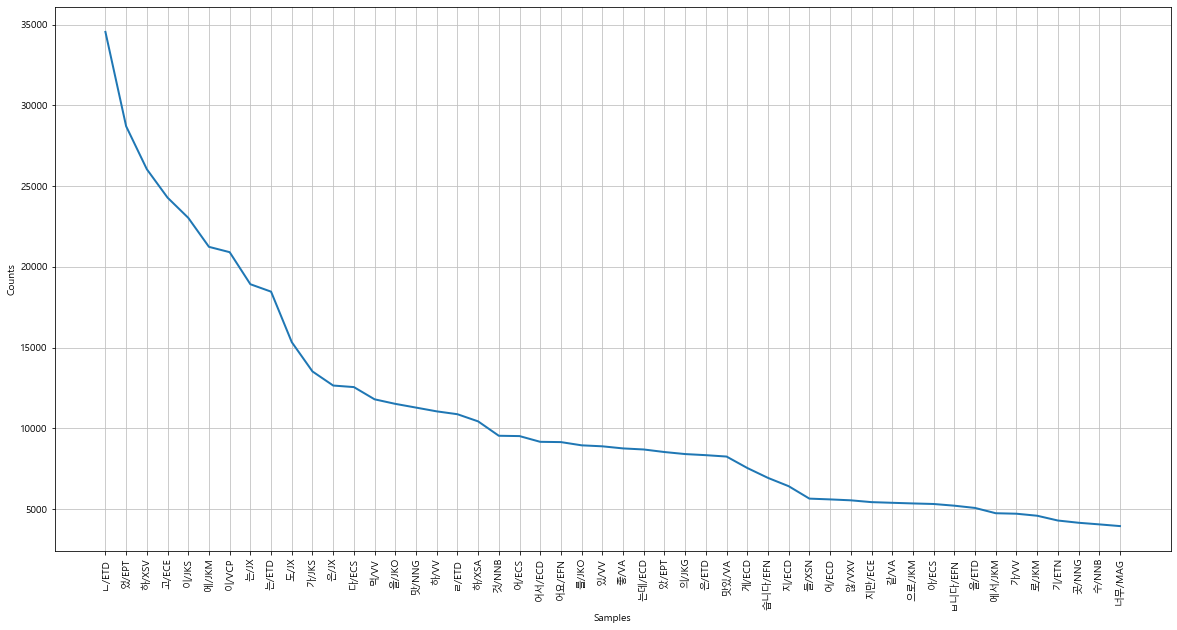

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [10]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]
selected_words[0:10]

['ㄴ/ETD',
 '었/EPT',
 '하/XSV',
 '고/ECE',
 '이/JKS',
 '에/JKM',
 '이/VCP',
 '는/JX',
 '는/ETD',
 '도/JX']

In [11]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d in train_x]
test_x = [term_frequency(d) for d in test_x]
train_y = [c for c in train_y]
test_y = [c for c in test_y]

In [12]:
print(train_x[0:10])

[[2, 2, 3, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

### modeling

In [14]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

naivebayes = MultinomialNB()
naivebayes.fit(x_train, y_train)

'''for i in np.arange(0, 1.01, 0.05):
    threshold = i
    predicated_proba = naivebayes.predict_proba(x_test)
    predicted = (predicated_proba[:,1] >= i).astype('int')
    
    accuracy = accuracy_score(y_test, predicted)
    print('threshold = {}, accuracy = {}'.format(i, accuracy))'''

print('Navie Bayes accuracy = {}'.format(naivebayes.score(x_test,y_test)))

Navie Bayes accuracy = 0.7309197651663405


### ROC curve

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = naivebayes.predict(x_test).ravel()
#y_pred = (predicated_proba[:,1] >= 0.7).astype('int')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(fpr, tpr)
auc_curve

0.7306319600788693

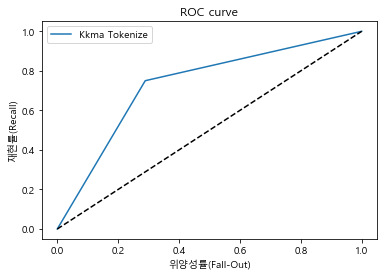

In [16]:
plt.plot(fpr, tpr, label='Kkma Tokenize')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC curve')
plt.show()

### Confusion Matrix

In [17]:
print(confusion_matrix(y_test, y_pred))
print('Recall = {}'.format(recall_score(y_test, y_pred)))

[[1432  582]
 [ 518 1556]]
Recall = 0.7502410800385728


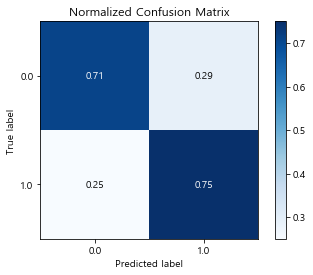

In [18]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### F1- Score

In [19]:
print('F1 - Score = {}'.format(f1_score(y_test, y_pred)))

F1 - Score = 0.7388414055080721
